# Seaborn 빈도 그래프
- `.catplot()` 메서드의 사용방법
- `.catplot()`는 막대 그래프 중에서 빈도 그래프 그리는 기능에 최적화 됨

### 1. 기본 준비

In [11]:
# 패키지 참조
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

# 그래프 전역 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.unicode_minus"] = False

# 데이터 준비하기 - 타이타닉 탑승객 데이터 (https://www.kaggle.com/competitions/titanic)
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
titanic.head() # -> 상위 5개 데이터만 확인

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 데이터 전처리

#### 범주형 데이터 처리

In [12]:
# 각 요인별 데이터 타입 확인
titanic.dtypes

# 범주형 데이터처리
df = titanic.astype({'Survived': 'category', 'Pclass': 'category', 'Sex': 'category',
                     'Cabin': 'category', 'Embarked': 'category'})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

### 3. 빈도 막대 그래프
- 병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프
- `.catplot()` 메서드 사용
- `.catplot()` 은 기본적으로 범주형 변수에 대한 그래프를 그리는 데 사용되지만, 다양한 플롯 유형을 지원

#### 1) 기본 사용 방법
- x축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 `kind = 'count'` 파라미터 설정
- `.catplot()`함수의 결과물은 그래프의 크기가 rcParams 속성의 영향을 받지 않음
- 크기 설정을 위해서는 `.catplot()` 메서드로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 함
- 예)

g = sb.catplot(data = df, x = 'Pclass', kind = 'count')

g.fig.set_figwidth(3)

g.fig.set_figheight(1)

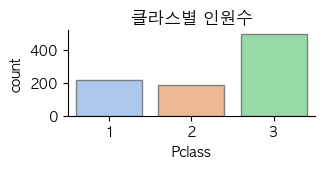

In [13]:
g = sb.catplot(data = df,
               x = 'Pclass',        # 집단을 구분하는 기준
               kind = 'count',      # 그래프 종류
               palette = 'pastel',  # 색상표 지정
               edgecolor = '0.5')   # 막대 테두리 색상 투명도 지정 (0=불투명 ~ 1=투명, 0.5=반투명)

g.fig.set_figwidth(3)
g.fig.set_figheight(1)

plt.title('클라스별 인원수')
plt.show()
plt.close()

#### 2) 범례 기준 추가
- 각 막대를 구분할 수 있는 범주형 변수를 `hue` 파라미터로 추가
- `kind`: 그래프의 종류는 범주형 축 수준 플로팅 함수의 이름 (그래프 형태에 관여)
    - count, strip, swarm, bow, violin, boxen, point, bar 등

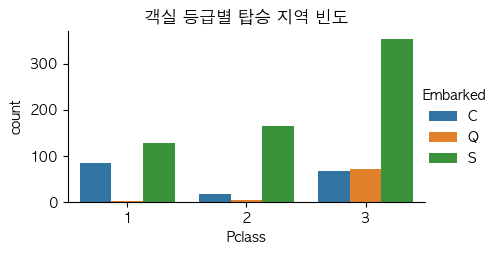

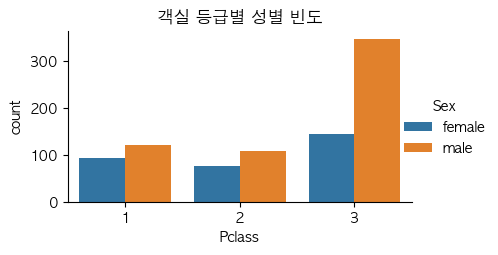

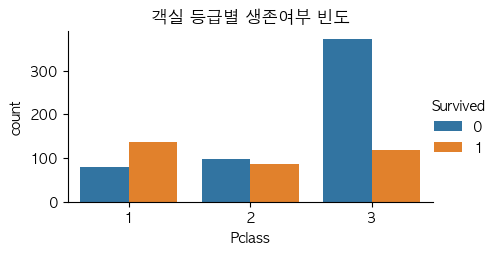

In [18]:
# 객실 등급별 탑승 지역 빈도
g = sb.catplot(data = df,
           x = 'Pclass',        # 집단을 구분하는 기준
           kind = 'count',      # 빈도 막대그래프 그리기
           hue = 'Embarked')    # 'Embarked' 컬럼 (탑승 지역) 별 데이터
g.fig.set_figwidth(5)
g.fig.set_figheight(2)
plt.title('객실 등급별 탑승 지역 빈도')
plt.show()
plt.close()

# 객실 등급별 성별 빈도
g = sb.catplot(data = df,
           x = 'Pclass',        # 집단을 구분하는 기준
           kind = 'count',      # 빈도 막대그래프 그리기
           hue = 'Sex')         # 'Sex' 컬럼 (성별) 별 데이터
g.fig.set_figwidth(5)
g.fig.set_figheight(2)
plt.title('객실 등급별 성별 빈도')
plt.show()
plt.close()

# 객실 등급별 생존여부 빈도
g = sb.catplot(data = df,
           x = 'Pclass',        # 집단을 구분하는 기준
           kind = 'count',      # 빈도 막대그래프 그리기
           hue = 'Survived')    # 'Survived' 컬럼 (생존여부) 별 데이터
g.fig.set_figwidth(5)
g.fig.set_figheight(2)
plt.title('객실 등급별 생존여부 빈도')
plt.show()
plt.close()




#### 3) 병렬 빈도 막대 그래프
- 이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 2개로 분리
- `병렬 막대그래프`는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프
- Seaborn으로 병렬 빈도 막대그래프를 그리려면 `sns.catplot` 함수에 `kind='count'` 와 `col` 옵션 추가

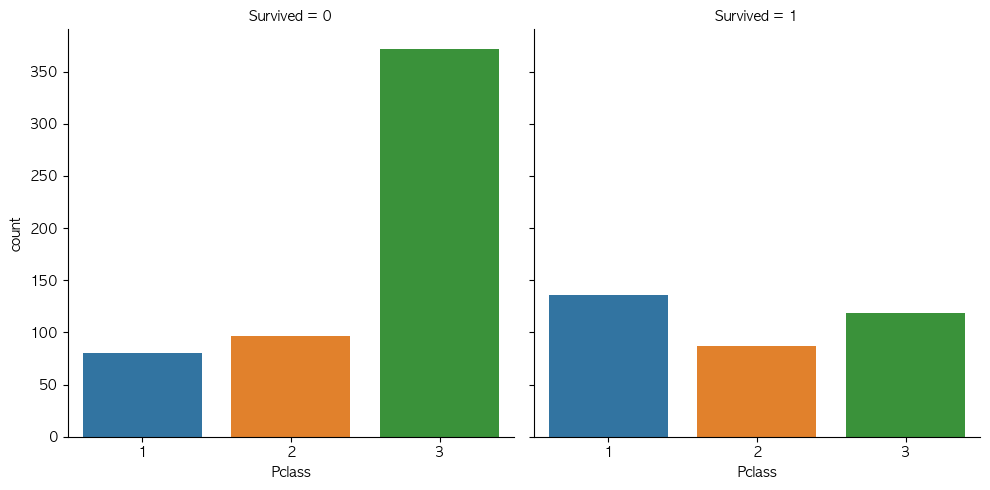

In [21]:
# 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리
sb.catplot(data=titanic,
            x='Pclass',
            col='Survived',   # 캔버스 분리하기
            kind='count'      # 빈도 막대그래프 그리기
        )
plt.show()
plt.close()

#### 4) 가로 빈도 막대 그래프
- x 파라미터 대신 y 파라미터를 사용

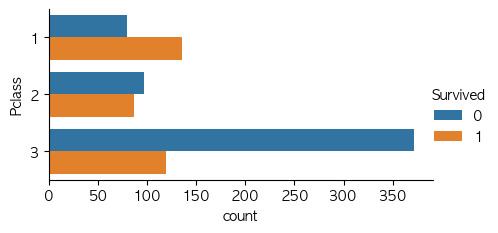

In [22]:
g = sb.catplot(data = df,
               y = 'Pclass',
               kind = 'count',
               hue = 'Survived')
g.fig.set_figwidth(5)
g.fig.set_figheight(2)
plt.show()
plt.close()